In [10]:
import numpy as np
from keras.datasets import mnist
import sys

(x_train,y_train),(x_test,y_test) = mnist.load_data()

images ,labels = (x_train[0:1000].reshape(1000,28*28)/255,y_train[0:1000])

one_hot_labels = np.zeros((len(labels),10))

for i,l in enumerate(labels):
    one_hot_labels [i][l] = 1
labels = one_hot_labels

#TESTING DATA
test_images = x_test.reshape(len(x_test),28*28)/255
test_labels = np.zeros((len(y_test),10))

for i,l in enumerate (y_test):
    test_labels[i][l] = 1

relu = lambda x:(x>0) * x
relu2deriv = lambda output:output >= 0
alpha,hidden_size,pixelsPerImage,num_labels =(0.005,40,784,10)
np.random.seed(1)
weights_01 = 0.2 * np.random.random((pixelsPerImage,hidden_size)) - 0.1
weights_02 = 0.2 * np.random.random((hidden_size,num_labels)) - 0.1
for iterations in range (350):
    (Train_error,Train_correct_cnt) = (0.0,0)
    for i in range (len(images)):
        layer_0 = images[i:i+1]
        layer_1 = relu(np.dot(layer_0,weights_01))
        drop_out_mask =  np.random.randint(2,size = layer_1.shape)
        layer_1 *= drop_out_mask * 2
        layer_2 = np.dot(layer_1,weights_02)
        Train_error += np.sum((labels[i:i+1] - layer_2 ) ** 2)
        Train_correct_cnt += int(np.argmax(layer_2) == np.argmax(labels[i:i+1]))
        layer_2_delta = labels[i:i+1] - layer_2
        layer_1_delta = layer_2_delta.dot(weights_02.T) * relu2deriv(layer_1)
        layer_1_delta *= drop_out_mask
        weights_01_delta = layer_0.T.dot(layer_1_delta)
        weights_02_delta = layer_1.T.dot(layer_2_delta)

        weights_01 += alpha * weights_01_delta
        weights_02 += alpha * weights_02_delta
    '''if(iterations % 10 == 0 or iterations == 349):  
        test_error, test_correct_cnt = (0.0, 0)
        for i in range(len(test_images)):
            layer_0 = test_images[i:i+1]        
            layer_1 = relu(np.dot(layer_0,weights_01))        
            layer_2 = np.dot(layer_1,weights_02)
            test_error += np.sum((test_labels[i:i+1] - layer_2) ** 2)       
            test_correct_cnt += int(np.argmax(layer_2) == np.argmax(test_labels[i:i+1]))  
      
        #sys.stdout.write(f"{iterations} "+" Train_Err:" + str(Train_error/float(len(images)))[0:5] +           
         #                    " Test-Acc:" + str(Train_correct_cnt/float(len(images)))[0:5])
        #sys.stdout.write(" Test-Err:" + str(test_error/float(len(test_images)))[0:5] +           
          #                " Test-Acc:" + str(test_correct_cnt/float(len(test_images)))[0:5] + "\n")
print(weights_01)
print(weights_02)'''

[[-0.0165956   0.0440649  -0.09997713 ...  0.06692513 -0.09634234
   0.05002886]
 [ 0.09777222  0.04963313 -0.0439112  ... -0.03044683  0.05016242
   0.0451996 ]
 [ 0.07666122  0.02473444  0.05018849 ...  0.08460491  0.04230495
  -0.07514581]
 ...
 [ 0.01278792 -0.09335507  0.07751823 ...  0.09348249 -0.06255046
  -0.0724688 ]
 [ 0.02621576  0.03130522  0.0567295  ... -0.02118333 -0.06391994
   0.07874013]
 [-0.01947632  0.07673669  0.09756995 ...  0.03445804  0.03748222
   0.05496171]]
[[ 2.10497319e-03 -1.21553168e-03 -1.16523172e-02  1.30213966e-03
  -1.74449047e-02 -1.52850763e-03  1.80605206e-01 -8.63033973e-04
  -6.06403319e-03 -3.74992990e-04]
 [-9.19692846e-04  3.17698825e-04 -1.24419400e-03  2.70744822e-03
  -1.71108443e-03  1.60743630e-01 -2.93039221e-04 -3.58781182e-04
  -1.22263441e-03  6.41293167e-04]
 [ 1.15586731e-02 -8.96894570e-04 -5.13566402e-03  1.11435673e-02
   1.22325463e-03  1.29364370e-01  1.31957160e-02  2.00257160e-04
  -1.97799141e-03 -6.44960256e-04]
 [ 4.99

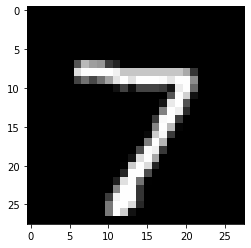

In [30]:
import matplotlib.pyplot as plt
import matplotlib.image as img
plt.imshow(x_test[0],cmap = "gray")

layer_0 = x_test[0].reshape((28*28))
layer_1 = relu(np.dot(layer_0,weights_01))
layer_2 = np.dot(layer_1,weights_02)
print(layer_2)
